<a href="https://colab.research.google.com/github/Chandayadav123/Chandayadav123/blob/main/Climate_change_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
carbon_df = pd.read_csv('MER_T12_06.csv')
disasters_df = pd.read_csv('number-of-natural-disaster-events.csv')
econ_df = pd.read_csv('economic-damage-from-natural-disasters.csv')

In [4]:
# Look at the data for natural disasters
disasters_df.head()

,Entity,Code,Year,Number of reported natural disasters (reported disasters)
0,All natural disasters,NaN,1900,5
1,All natural disasters,NaN,1901,2
2,All natural disasters,NaN,1902,9
3,All natural disasters,NaN,1903,8
4,All natural disasters,NaN,1904,2


In [8]:
disasters_df.drop(columns = 'Code')
econ_df.drop(columns ='Code')


,Entity,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,1900,30000000
1,All natural disasters,1901,0
2,All natural disasters,1902,0
3,All natural disasters,1903,480000000
4,All natural disasters,1904,0
...,...,...,...
556,Wildfire,2014,259000000
557,Wildfire,2015,3439820000
558,Wildfire,2016,6287000000
559,Wildfire,2017,1019000000


In [9]:
#What Kinds of Values are There for "Entity"?¶

disasters_df['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

In [10]:
disasters_df['Year'].min(),disasters_df['Year'].max()

(1900, 2018)

In [11]:
def grab_decade(start_yr, y_c_data, interval=10):
    '''Return years and counts for only a specific interval length.'''
    end_yr = int(start_yr) + interval - 1
    years = y_c_data[(y_c_data['years'] <= end_yr) & (y_c_data['years'] >= start_yr)]
    return years

def compute_decade_mean(start_yr, y_c_data):
    '''Sum the number of total disasters over a given period of 10 years, returns the mean.'''
    years = grab_decade(start_yr, y_c_data)
    # compute and return the mean
    return years['counts'].sum() / 10

In [13]:
def compute_means(y_c_data):
    '''Returns a dict of all mean number of disasters that occurred for every decade, 1900-2010.'''
    # compute the amount of decades in our data
    start_yr, end_yr = y_c_data['years'].min(), y_c_data['years'].max()
    decades = (end_yr - start_yr) // 10
    # store all the means in a dict
    decade_means = dict()
    for i in range(start_yr, end_yr, 10):
        decade_means[f'{i}'] = compute_decade_mean(i, y_c_data)
    return decade_means

In [14]:
# Calling the function
ALL_DIS = 'All natural disasters'
COUNT = 'Number of reported natural disasters (reported disasters)'
counts = disasters_df[(disasters_df['Entity'] == ALL_DIS)][COUNT]  # just the counts of all natural disasters, all years
years = disasters_df[(disasters_df['Entity'] == ALL_DIS)]['Year']  # just the years
y_c_data = pd.DataFrame(data={
                        'years':years, 
                        'counts':counts})
means_by_decade = compute_means(y_c_data)

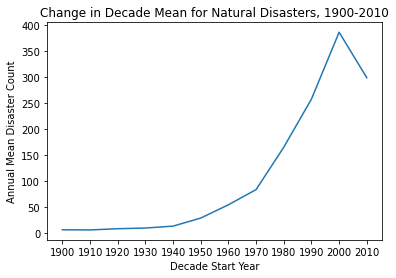

In [15]:
plt.plot(list(means_by_decade.keys()), list(means_by_decade.values()))
plt.xlabel('Decade Start Year')
plt.ylabel('Annual Mean Disaster Count')
plt.title('Change in Decade Mean for Natural Disasters, 1900-2010')
plt.show()

In [16]:
def compute_decade_median(start_yr, y_c_data):
    '''Return the median of total disasters over a given period of 10 years.'''
    years = grab_decade(start_yr, y_c_data)
    # compute and return the median
    return years['counts'].median()

def compute_medians(y_c_data):
    '''Returns a dict of all mean number of disasters that occurred for every decade, 1900-2010.'''
    # compute the amount of decades in our data
    start_yr, end_yr = y_c_data['years'].min(), y_c_data['years'].max()
    decades = (end_yr - start_yr) // 10
    # store all the medians in a dict
    decade_medians = dict()
    for i in range(start_yr, end_yr, 10):
        decade_medians[f'{i}'] = compute_decade_median(i, y_c_data)
    return decade_medians

medians_by_decade = compute_medians(y_c_data)

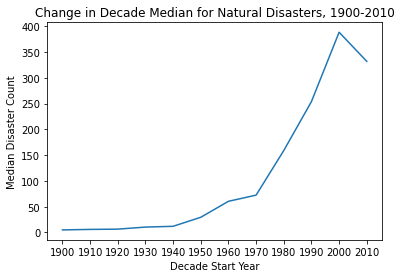

In [17]:
plt.plot(list(medians_by_decade.keys()), list(medians_by_decade.values()))
plt.xlabel('Decade Start Year')
plt.ylabel('Median Disaster Count')
plt.title('Change in Decade Median for Natural Disasters, 1900-2010')
plt.show()

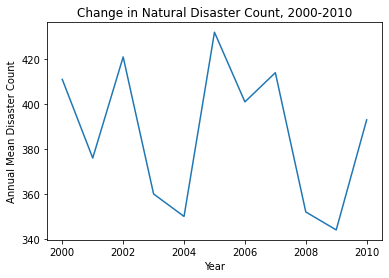

In [18]:
counts = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] >= 2000) & (disasters_df['Year'] <= 2010)]['Number of reported natural disasters (reported disasters)']
plt.plot(list(range(2000, 2011)), counts)
plt.xlabel('Year')
plt.ylabel('Annual Mean Disaster Count')
plt.title('Change in Natural Disaster Count, 2000-2010')
plt.show()

In [19]:
# find all rows reporting "all natural disasters"
COUNT = 'Number of reported natural disasters (reported disasters)'
all_disasters = disasters_df[disasters_df['Entity'] == 'All natural disasters'][COUNT]
# sum them together, divide by their number
mean_disasters = np.sum(all_disasters) / len(all_disasters)
# print the mean
mean_disasters

111.02521008403362

In [21]:
#How Many Years Between 1900-2018 Have More Than This Mean?¶



count = 0
for num in all_disasters:
    if num > mean_disasters:
        count += 1
count

42

In [22]:
all_disasters_years_and_counts = disasters_df[(disasters_df['Entity'] == 'All natural disasters')]
years_2000_2018 = all_disasters_years_and_counts.tail(19)
count = 0
for num in years_2000_2018['Number of reported natural disasters (reported disasters)']:
    if num > mean_disasters:
        count += 1
        
percent_val = round((count/19) * 100, 2)  
print(f'{percent_val}%')  # have all these years surpassed the mean we calculated?

100.0%


In [23]:
print(f'{round((19/42) * 100, 2)}%')


45.24%


In [24]:
# slice the DataFrame by century
disasters_20th = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] <= 1999) & (disasters_df['Year'] >= 1900)]
disasters_21st = disasters_df[(disasters_df['Entity'] == 'All natural disasters') & (disasters_df['Year'] >= 2000) & (disasters_df['Year'] <= 2018)]

# find the mean annual number of disasters in the 20th century
mean_20th = disasters_20th[COUNT].values.mean()

# compute the percent of years in the 21st century which is greater than this value
percent_over = len(disasters_21st[disasters_21st[COUNT] > mean_20th]) / len(disasters_21st) * 100
print(f'{percent_over}%')

100.0%


In [25]:
# find the total number of years with counts above the mean_20th
count_above_mean = len(all_disasters[all_disasters > mean_20th])
print(f'{round((18/count_above_mean) * 100, 2)}%')

37.5%


In [26]:
y_c_data

,years,counts
0,1900,5
1,1901,2
2,1902,9
3,1903,8
4,1904,2
...,...,...
114,2014,320
115,2015,380
116,2016,325
117,2017,276


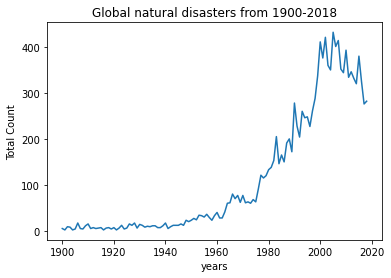

In [27]:
plt.plot(y_c_data['years'],y_c_data['counts'])
plt.title('Global natural disasters from 1900-2018')
plt.ylabel('Total Count')
plt.xlabel('years')
plt.show()



In [30]:
#What's the probability that any given natural disaster between 1900-2018, happened 1900-1999?

def probability_for_interval(start_year, end_year):
    # take the sum of all natural disasters that occurred 1900-2018
    sum_all = y_c_data['counts'].sum()
    # take the sum that happen over the interval
    yrs_in_range = y_c_data[(y_c_data['years'] < end_year) & (y_c_data['years'] > start_year)]
    sum_yrs = yrs_in_range['counts'].sum()
    # return the probability
    percent = round((sum_yrs/sum_all) * 100, 2)
    return percent
    
prob_20th = probability_for_interval(1900, 2000)
print(f'{prob_20th}%')

48.12%


In [31]:
prob_21st = probability_for_interval(2000, 2018)
print(f'{prob_21st}%')

46.59%


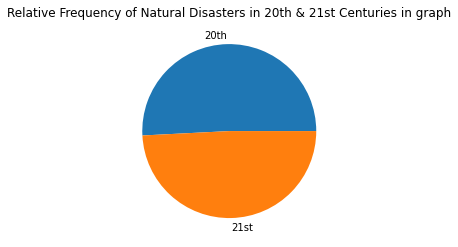

In [33]:
plt.pie([prob_20th , prob_21st], labels = ['20th' , '21st'])
plt.title('Relative Frequency of Natural Disasters in 20th & 21st Centuries in graph')
plt.show()

In [34]:
def find_remove_outlier_iqr(disaster_counts):
    '''Remove the outliers from the dataset of annual total nautral disasters.'''
    # calculate interquartile range
    q25, q75 = np.percentile(disaster_counts, 25), np.percentile(disaster_counts, 75)
    iqr = q75 - q25
    print(f'This is the IQR: {iqr}')
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in disaster_counts if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in disaster_counts if x > lower and x < upper]
    return outliers

print(f'Number of outliers removed from the data: {len(find_remove_outlier_iqr(counts))}')

This is the IQR: 56.5
Number of outliers removed from the data: 0


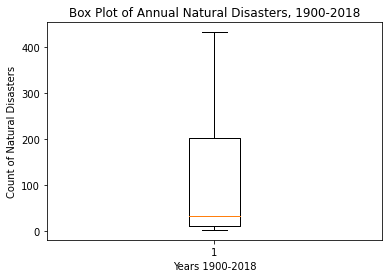

In [35]:
# show box plot
counts = all_disasters_years_and_counts['Number of reported natural disasters (reported disasters)']
plt.boxplot(counts)
plt.title("Box Plot of Annual Natural Disasters, 1900-2018")
plt.ylabel("Count of Natural Disasters")
plt.xlabel("Years 1900-2018")
plt.show()

In [36]:
carbon_df.head()
carbon_df['Description'].values

array(['Coal Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions',
       'Coal Electric Power Sector CO2 Emissions', ...,
       'Total Energy Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

In [37]:
carbon_df.tail()


,MSN,YYYYMM,Value,Column_Order,Description,Unit
5089,TXEIEUS,201603,115.997,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5090,TXEIEUS,201604,113.815,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5091,TXEIEUS,201605,129.44,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5092,TXEIEUS,201606,172.074,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5093,TXEIEUS,201607,201.958,9,Total Energy Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [38]:
# store the annual emissions count in a dict
years_emissions = dict()
# just look at emissions from total electric output
carbon_total = carbon_df[carbon_df['Description'] == 'Total Energy Electric Power Sector CO2 Emissions']
# traverse through the years
for i in range(197300, 201700, 100):
    # find all the rows in the data for the year we're currently on
    year = carbon_total[(carbon_total['YYYYMM'] >= i) & (carbon_total['YYYYMM'] <= i + 12)]
    # sum the emissisons for that one year
    sum = 0.0
    for value in year['Value']:
        # handle the invalid values
        if value == 'Not Available':
            value = 0.0
        sum += float(value)
    # store it in the dict
    years_emissions[int(i/100)] = sum
# Voila! A dict of all years and their emissions counts, 1973-2016
print(years_emissions)
# One of the things to note in this data is that NaN values were replaced 0, but this is likely far from the
# true number of emissions made that month

{1973: 1286.353, 1974: 1250.643, 1975: 1243.814, 1976: 1351.1860000000001, 1977: 1442.127, 1978: 1447.658, 1979: 1505.2470000000003, 1980: 1543.709, 1981: 1551.136, 1982: 1480.7900000000002, 1983: 1520.703, 1984: 1588.2939999999999, 1985: 1619.1449999999998, 1986: 1613.2489999999996, 1987: 1680.19, 1988: 1757.5199999999998, 1989: 1825.562, 1990: 1831.0010000000002, 1991: 1829.556, 1992: 1843.4219999999998, 1993: 1919.0849999999998, 1994: 1943.8449999999998, 1995: 1960.0349999999999, 1996: 2033.2369999999999, 1997: 2101.384, 1998: 2191.771, 1999: 2204.392, 2000: 2310.169, 2001: 2272.636, 2002: 2288.035, 2003: 2319.17, 2004: 2350.377, 2005: 2415.5270000000005, 2006: 2358.322, 2007: 2424.9139999999998, 2008: 2372.831, 2009: 2157.826, 2010: 2270.2549999999997, 2011: 2169.669, 2012: 2034.3249999999998, 2013: 2049.838, 2014: 2049.826, 2015: 1918.4820000000002, 2016: 1025.42}


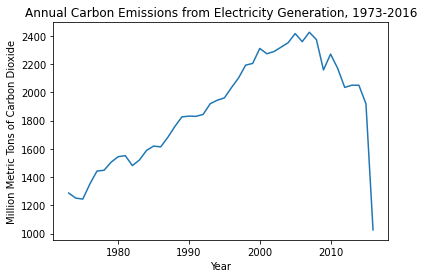

In [39]:
plt.plot(list(years_emissions.keys()), list(years_emissions.values()))
plt.title('Annual Carbon Emissions from Electricity Generation, 1973-2016')
plt.xlabel('Year')
plt.ylabel('Million Metric Tons of Carbon Dioxide')
plt.show()

In [40]:
#Getting a Feel for the Economic Data
econ_df.head()



,Entity,Code,Year,Total economic damage from natural disasters (US$)
0,All natural disasters,NaN,1900,30000000
1,All natural disasters,NaN,1901,0
2,All natural disasters,NaN,1902,0
3,All natural disasters,NaN,1903,480000000
4,All natural disasters,NaN,1904,0


In [41]:
# combining datasets
df = disasters_df.rename(columns={'Number of reported natural disasters (reported disasters)': 'Disaster Count'})
df2 = econ_df.rename(columns={'Total economic damage from natural disasters (US$)':'Cost'})
df['Cost'] = df2['Cost']
df.head()

,Entity,Code,Year,Disaster Count,Cost
0,All natural disasters,NaN,1900,5,30000000.0
1,All natural disasters,NaN,1901,2,0.0
2,All natural disasters,NaN,1902,9,0.0
3,All natural disasters,NaN,1903,8,480000000.0
4,All natural disasters,NaN,1904,2,0.0


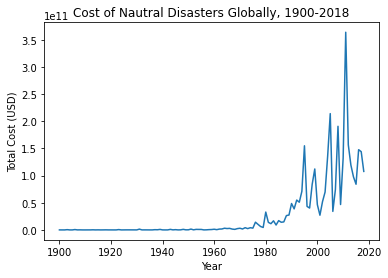

In [43]:
dollars = df[df['Entity'] == 'All natural disasters']['Cost']
plt.plot(years, dollars)
plt.title('Cost of Nautral Disasters Globally, 1900-2018')
plt.ylabel('Total Cost (USD)')
plt.xlabel('Year')
plt.show()

In [44]:
def pearson_corr(x, y):
    '''Given two lists of numbers x and y, return the value of their Pearson correlation coefficient.'''
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

# get a lists of the counts and the costs
counts = df[(df['Entity'] == 'All natural disasters') & (df['Year'] <= 2018) & (df['Year'] >= 1900)]['Disaster Count']
costs = df[(df['Entity'] == 'All natural disasters') & (df['Year'] <= 2018) & (df['Year'] >= 1900)]['Cost']
corr_cost_count = pearson_corr(costs, counts)
print(f'Correlation between cost of damages and disaster count: {corr_cost_count}.')

Correlation between cost of damages and disaster count: 0.7547597509253345.
